In [2]:
from PIL import Image
import PIL
import pytesseract
from pytesseract import Output
import numpy as np
import re
import cv2
import spacy
import os 
import glob
import json
import pandas as pd
from pdf2image import convert_from_path



#main function   
def ocr_main(img):
    text = pytesseract.image_to_string(img)
    return text



#reading the image

img = cv2.imread('invoice.jpg') 

#PREPROCESSING THE IMAGE

#Grayscaling
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
 
#Thresholding
def thresholding(image):
    return cv2.threshold(image, 100, 230, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#Dilation 
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#Erosion 
def erode(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#Opening erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#resizing the image
def resize(image):
    return cv2.resize(image,None,fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    

#skewness correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


#Canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#Median blur
def gauss(image):
    return cv2.GaussianBlur(image2,(3,3),cv2.BORDER_DEFAULT)


Calling Preprocessing functions according to user needs 

img= get_grayscale(img)
img= thresholding(img)
img= remove_noise(img)
img= erode(img)
img= dilate(img)
img= opening(img)
img= resize(img)


#Creating a dictionary to store OCR results
d = pytesseract.image_to_data(img, output_type=Output.DICT)
##print(d.keys())


#Creating Bounding Boxes to view
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)


        

#OEM CONTROLS TYPE OF Algo used and psm controls page segmentation
custom_oem_psm_config =r'--oem 3 --psm 11'
print(ocr_main(img))


text = pytesseract.image_to_string(img, lang='eng', config=custom_oem_psm_config)
nlp = spacy.load("en_core_web_sm")
sents = nlp(text)
count =1
data_list = []

#### Text Labelling on entities

for sent in sents:
    #print(sent)
    tokens = sent.text.split(" ")
    for i in range(len(tokens)):
        var = tokens[i]
        data = {}
        
        # print(var)
        if re.match(r'^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[1-9A-Z]{1}Z[0-9A-Z]{1}$', str(var)):
            print("GST Number", str(var))
            data.update({"GST Number": str(var)})
        elif re.search(r'^[a-zA-Z]{5}[0-9]{4}[a-zA-Z]$', re.sub(r'\s+', '', str(var))):
                print("PAN Number", str(var))
                data.update({"PAN Number": str(var)})
        # Using Regular expression to match dates
        elif re.match(r'^(0[1-9]|[12][0-9]|3[01]).(0[1-9]|1[012]).(19|20)\d\d$', str(var)):
            print("Date of Invoice", str(var))
            data.update({"Date of Invoice": str(var)})
        #Simple number for amount
        elif re.match(r'\d{1,6}', str(var)):
            print("Amount", str(var))
            data.update({"Amount" : str(var)})


        count = count + 1
        if data != {}:
            data_list.append(data)
            


#Printing the data dictinoary
print(data_list)

#Exporting result to CSV file
df =pd.DataFrame(data_list)
df.to_csv('output.csv')

#Using OpenCV  to Preview Preprocessed image

#cv2.imshow('img', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


| am Curious about
area-filling text



For PDF file use script below




In [5]:
from PIL import Image
import PIL
import pytesseract
from pytesseract import Output
import numpy as np
import re
import cv2
import spacy
import os 
import glob
import json
import pandas as pd
from pdf2image import convert_from_path


#Converting pdf2image 
pdfs =r"invoice3.pdf"
pages= convert_from_path(pdfs,500)

i=1
for page in pages:
    image_name="page"+ str(i) + ".jpg"
    page.save(image_name,"JPEG")
    i=i+1

#main function   
def ocr_main(img):
    text = pytesseract.image_to_string(img)
    return text


#reading the image

img = cv2.imread(image_name) 

#PREPROCESSING THE IMAGE

#Grayscaling
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
 
#Thresholding
def thresholding(image):
    return cv2.threshold(image, 100, 230, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#Dilation 
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#Erosion 
def erode(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#Opening erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#resizing the image
def resize(image):
    return cv2.resize(image,None,fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    

#skewness correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


#Canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#Median blur
def gauss(image):
    return cv2.GaussianBlur(image2,(3,3),cv2.BORDER_DEFAULT)


#Calling Preprocessing functions according to user needs 

img= get_grayscale(img)
img= thresholding(img)
#img= remove_noise(img)
#img= erode(img)
#img= dilate(img)
img= opening(img)
#img= resize(img)


#Creating a dictionary to store OCR results
d = pytesseract.image_to_data(img, output_type=Output.DICT)
##print(d.keys())


#Creating Bounding Boxes to view
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)


        

#OEM CONTROLS TYPE OF Algo used and psm controls page segmentation
#custom_oem_psm_config =r'--oem 3 --psm 11'
print(ocr_main(img))


text = pytesseract.image_to_string(img, lang='eng',) #config=custom_oem_psm_config)
nlp = spacy.load("en_core_web_sm")
sents = nlp(text)
count =1
data_list = []

#### Text Labelling on entities

for sent in sents:
    #print(sent)
    tokens = sent.text.split(" ")
    for i in range(len(tokens)):
        var = tokens[i]
        data = {}
        
        # print(var)
        if re.match(r'^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[1-9A-Z]{1}Z[0-9A-Z]{1}$', str(var)):
            print("GST Number", str(var))
            data.update({"GST Number": str(var)})
        elif re.search(r'^[a-zA-Z]{5}[0-9]{4}[a-zA-Z]$', re.sub(r'\s+', '', str(var))):
                print("PAN Number", str(var))
                data.update({"PAN Number": str(var)})
        # Using Regular expression to match dates
        elif re.match(r'^(0[1-9]|[12][0-9]|3[01]).(0[1-9]|1[012]).(19|20)\d\d$', str(var)):
            print("Date of Invoice", str(var))
            data.update({"Date of Invoice": str(var)})
        #Simple number for amount
        elif re.match(r'\d{1,6}', str(var)):
            print("Amount", str(var))
            data.update({"Amount" : str(var)})


        count = count + 1
        if data != {}:
            data_list.append(data)
            


#Printing the data dictinoary
print(data_list)

#Exporting result to CSV file
df =pd.DataFrame(data_list)
df.to_csv('output2.csv')


#Using OpenCV  to Preview Preprocessed image

#cv2.imshow('img', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


OICe NO! 198900000001

 

D 0 der D 2 a

White Will

6648 Acacia Rd!

Bronx] NY! (0457 Brooklyn) NY! (1203

05/03/2016
NO F 3

156546546465 19/03/2016

liem Quantity Price pen ffem ov VAT Amount

Excludes fl houn free consultation

20 H $15 § 80

Issue 404) (5A

Subtotal $
$

ry)
Ld

Total:

 

[This {s @ Hote al the end]

Amount 198900000001
Amount 0
Amount 2
Amount 6648
Amount 0457
Amount 1203
Date of Invoice 05/03/2016
Amount 3
Amount 156546546465
Date of Invoice 19/03/2016
Amount 20
Amount 15
Amount 80
Amount 404
Amount 5A
[{'Amount': '198900000001'}, {'Amount': '0'}, {'Amount': '2'}, {'Amount': '6648'}, {'Amount': '0457'}, {'Amount': '1203'}, {'Date of Invoice': '05/03/2016'}, {'Amount': '3'}, {'Amount': '156546546465'}, {'Date of Invoice': '19/03/2016'}, {'Amount': '20'}, {'Amount': '15'}, {'Amount': '80'}, {'Amount': '404'}, {'Amount': '5A'}]


For structured document BUILD IN PROGRESS

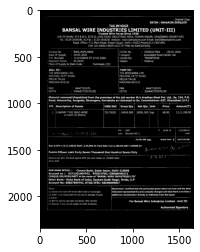

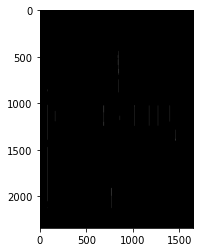

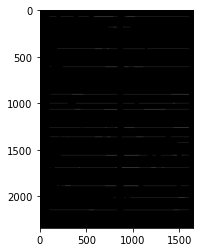

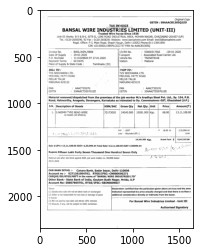

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#try:
#    from PIL import Image
#except ImportError:
#    import Image
#import pytesseract

#read your file
file=r'invoice.jpg'
img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('invoice.jpg',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("invoice.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("invoice.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("invoice.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

COMBINING  OCR LIBRARY to get result in CSV


In [32]:
from PIL import Image
import PIL
import pytesseract
from pytesseract import Output
import numpy as np
import re
import cv2
import spacy
import os 
import glob
import json
import pandas as pd
from pdf2image import convert_from_path
import tabula
from tabulate import tabulate
import pandas as pd


#Converting pdf2image 
pdfs =r"invoice3.pdf"
pages= convert_from_path(pdfs,500)

i=1
for page in pages:
    image_name="page"+ str(i) + ".jpg"
    page.save(image_name,"JPEG")
    i=i+1

#main function   
def ocr_main(img):
    text = pytesseract.image_to_string(img)
    return ("Pytesseract_OCR_Done")


#reading the image

img = cv2.imread(image_name) 

#PREPROCESSING THE IMAGE

#Grayscaling
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Noise removal
def remove_noise(image):
    return cv2.medianBlur(image,3)
 
#Thresholding
def thresholding(image):
    return cv2.threshold(image, 100, 230, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#Dilation 
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#Erosion 
def erode(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#Opening erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#resizing the image
def resize(image):
    return cv2.resize(image,None,fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
    

#skewness correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


#Canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#Median blur
def gauss(image):
    return cv2.GaussianBlur(image2,(3,3),cv2.BORDER_DEFAULT)


#Calling Preprocessing functions according to user needs 

img=get_grayscale(img)
img= thresholding(img)
img= remove_noise(img)
img= erode(img)
img= dilate(img)
img= opening(img)
img= resize(img)


#Creating a dictionary to store OCR results
d = pytesseract.image_to_data(img, output_type=Output.DICT)
##print(d.keys())


#Creating Bounding Boxes to view
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)


        

#OEM CONTROLS TYPE OF Algo used and psm controls page segmentation
custom_oem_psm_config =r'--oem 3 --psm 11'
print(ocr_main(img))


text = pytesseract.image_to_string(img, lang='eng',) #config=custom_oem_psm_config)
nlp = spacy.load("en_core_web_sm")
sents = nlp(text)
count =1
data_list = []

#### Text Labelling on entities

for sent in sents:
    #print(sent)
    tokens = sent.text.split(" ")
    for i in range(len(tokens)):
        var = tokens[i]
        data = {}
        
        # print(var)
        if re.match(r'^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[1-9A-Z]{1}Z[0-9A-Z]{1}$', str(var)):
            print("GST Number", str(var))
            data.update({"GST Number": str(var)})
        elif re.search(r'^[a-zA-Z]{5}[0-9]{4}[a-zA-Z]$', re.sub(r'\s+', '', str(var))):
                print("PAN Number", str(var))
                data.update({"PAN Number": str(var)})
        # Using Regular expression to match dates
        elif re.match(r'^(0[1-9]|[12][0-9]|3[01]).(0[1-9]|1[012]).(19|20)\d\d$', str(var)):
            print("Date of Invoice", str(var))
            data.update({"Date of Invoice": str(var)})
        elif re.match(r'\d{6}', str(var)):
            #print("Account", str(var))
            data1.update({"AccountNo" : str(var)})
        #Simple number for amount
        elif re.match(r'\d{1,6}', str(var)):
            print("Amount", str(var))
            data.update({"Amount" : str(var)})
        


        count = count + 1
        if data != {}:
            data_list.append(data)
            


#Printing the data dictinoary
print(data_list)


#Exporting result to CSV file
df =pd.DataFrame(data_list)
df.to_csv('test1.csv')


#Using OpenCV  to Preview Preprocessed image

#cv2.imshow('img', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

###################TABULA####################
###################TABULA####################



filename=("invoice3.pdf")

tabula.convert_into(filename, "test2.csv", output_format="csv", pages='all')
print("tabula_OCR_completed")



##############CAMLOT#########################
##############CAMLOT#########################
'''Dosent work with the invoice pdf selected '''
#import camelot
#pdf = camelot.read_pdf("invoice3.pdf", pages='all')
#first_pdf = pdf[0]
#first_pdf.df
#first_pdf.to_csv("test3.csv")


#Merging CSV FILES
final_file = sorted(glob('test*.csv'))
final_file
%%time 
merge = pd.concat((pd.read_csv(file) for file in final_file), ignore_index = True)

#creating  a combined CSV
merge.to_csv('Merged.csv')

Pytesseract_OCR_Done
Amount 0
Amount 10457
Amount 1203
Date of Invoice 05/03/2016
Amount 7
Date of Invoice 19/03/2016
Amount 20
Amount 15
Amount 30
Amount 4043
Amount 5h
Amount 5053
Amount 5h
Amount 1,100
[{'Amount': '0'}, {'Amount': '10457'}, {'Amount': '1203'}, {'Date of Invoice': '05/03/2016'}, {'Amount': '7'}, {'Date of Invoice': '19/03/2016'}, {'Amount': '20'}, {'Amount': '15'}, {'Amount': '30'}, {'Amount': '4043'}, {'Amount': '5h'}, {'Amount': '5053'}, {'Amount': '5h'}, {'Amount': '1,100'}]
tabula_OCR_completed


'Dosent work with the invoice pdf selected '

In [1]:
import tabula
from tabulate import tabulate
import pandas as pd



filename=("invoice3.pdf")

tabula.convert_into(filename, "test.csv", output_format="csv", pages='all')
print("done")

Got stderr: Jan 06, 2022 3:52:54 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Jan 06, 2022 3:52:54 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jan 06, 2022 3:52:55 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>



done


In [2]:
pip install tabula
#Using regex to match account no of 6 digit
        elif re.match(r'\d{6}', str(var)):
            #print("Account", str(var))
            data1.update({"AccountNo" : str(var)})


  Created wheel for tabula: filename=tabula-1.0.5-py3-none-any.whl size=10601 sha256=db9e31eeee0260bb175c72168b476b749d7c82c03b9b1a872b3525828ffe8b52
  Stored in directory: /home/aayush/.cache/pip/wheels/0c/6b/25/f7f32d9ab1a2fdeeb40b83f50b19f8c42fbb76a189cdff8884
Successfully built tabula
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tabula-py

     |████████████████████████████████| 12.0 MB 12.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install camelot-py


     |████████████████████████████████| 40 kB 20 kB/s  eta 0:00:011
     |████████████████████████████████| 77 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 5.6 MB/s eta 0:00:01
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61101 sha256=05abf6878fa5f98a9b05cfaa7fe318ce1227252aaaadd2a488112eb1c98b2dc8
  Stored in directory: /home/aayush/.cache/pip/wheels/d9/dc/ec/72da68331f30074b9950c1737c23cb8a67484e61498bc9713d
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.


In [4]:
import camelot
pdf = camelot.read_pdf("invoice3.pdf", pages='all')
first_pdf = pdf[0]
first_pdf.df
first_pdf.to_csv("test3.csv")

IndexError: list index out of range

In [2]:
pip install ghostscript

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pdfminer

     |████████████████████████████████| 4.2 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 9.2 MB/s eta 0:00:01
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140100 sha256=8dc6636606b93d560aca1ab62eecf02069cb5301acd06bde1661b75532e1a87e
  Stored in directory: /home/aayush/.cache/pip/wheels/d1/aa/48/370f83a970d62355a2a47d2d640094a64eea932c22edae1891
Successfully built pdfminer
Note: you may need to restart the kernel to use updated packages.


In [16]:
#####PDFMINER###########


from io import StringIO
from pdfminer.pdfinterp import PDFPageInterpreter, PDFResourceManager
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams

# PDFMiner Analyzers
rsrcmgr = PDFResourceManager()
sio = StringIO()
codec = "utf-8"
laparams = LAParams()
device = TextConverter(rsrcmgr, sio, codec=codec, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

# path to our input file
pdf_file = ("invoice3.pdf")

# Extract text
pdfFile = open(pdf_file, "rb")
for page in PDFPage.get_pages(pdfFile):
    interpreter.process_page(page)
pdfFile.close()

# Return text from StringIO
text_1 = sio.getvalue()

#print(text)

text_1 = pytesseract.image_to_string(img, lang='eng', config=custom_oem_psm_config)
nlp = spacy.load("en_core_web_sm")
sents = nlp(text_1)
count =1
data_list1 = []

#### Text Labelling on entities

for sent in sents:
    #print(sent)
    tokens = sent.text.split(" ")
    for i in range(len(tokens)):
        var = tokens[i]
        data1 = {}
        
        # print(var)
        if re.match(r'^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[1-9A-Z]{1}Z[0-9A-Z]{1}$', str(var)):
            #print("GST Number", str(var))
            data1.update({"GST Number": str(var)})
        elif re.search(r'^[a-zA-Z]{5}[0-9]{4}[a-zA-Z]$', re.sub(r'\s+', '', str(var))):
            #print("PAN Number", str(var))
            data1.update({"PAN Number": str(var)})
        # Using Regular expression to match dates
        elif re.match(r'^(0[1-9]|[12][0-9]|3[01]).(0[1-9]|1[012]).(19|20)\d\d$', str(var)):
            #print("Date of Invoice", str(var))
            data1.update({"Date of Invoice": str(var)})
        #Simple number for amount
        elif re.match(r'\d{1,6}', str(var)):
            #print("Amount", str(var))
            data1.update({"Amount" : str(var)})


        count = count + 1
        if data1 != {}:
            data_list1.append(data1)
join

print(data_list1)

# Freeing Up
device.close()
sio.close()


[{'Amount': '196'}, {'Amount': '10457'}, {'Amount': '11203'}, {'Date of Invoice': '05/03/2016'}, {'Amount': '1965465464695'}, {'Date of Invoice': '19/03/2016'}, {'Amount': '10'}, {'Amount': '600'}, {'Amount': '300'}, {'Amount': '2U'}, {'Amount': '2'}, {'Amount': '15'}, {'Amount': '330'}, {'Amount': '404'}, {'Amount': '15h'}, {'Amount': '5053'}, {'Amount': '1,000'}, {'Amount': '1O%'}, {'Amount': '100'}]


In [28]:
from nltk.tokenize import word_tokenize
rsrcmgr = PDFResourceManager()
sio = StringIO()
codec = "utf-8"
laparams = LAParams()
device = TextConverter(rsrcmgr, sio, codec=codec, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

# path to our input file
pdf_file = ("invoice3.pdf")

# Extract text
pdfFile = open(pdf_file, "rb")
for page in PDFPage.get_pages(pdfFile):
    interpreter.process_page(page)
pdfFile.close()

# Return text from StringIO
text_1 = sio.getvalue()

#Printing the Extracted OCR from pdfminer
#print(text_1)


nlp = spacy.load("en_core_web_sm")
sentss = nlp(text_1)
count =1
data_list1 = []

#Text Labelling on entities for pdfminer
ai_token = word_tokenize(text_1)

for sent in sents:
    #print(sent)
    ai_token = sentss.text_1.split(" ")
    for i in range(len(ai_token)):
        var1 = ai_token[i]
        data1 = {}
        
        # print(var)
        if re.match(r'^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[1-9A-Z]{1}Z[0-9A-Z]{1}$', str(var)):
            #print("GST Number", str(var))
            data1.update({"GST Number": str(var1)})
        elif re.search(r'^[a-zA-Z]{5}[0-9]{4}[a-zA-Z]$', re.sub(r'\s+', '', str(var))):
            #print("PAN Number", str(var))
            data1.update({"PAN Number": str(var1)})
        # Using Regular expression to match dates
        elif re.match(r'^(0[1-9]|[12][0-9]|3[01]).(0[1-9]|1[012]).(19|20)\d\d$', str(var)):
            #print("Date of Invoice", str(var))
            data1.update({"Date of Invoice": str(var1)})
        #USing regex to match account no of 6 digit
        elif re.match(r'\d{6}', str(var)):
            #print("Account", str(var))
            data1.update({"AccountNo" : str(var1)})
         #Simple number for amount
        elif re.match(r'\d{3,6}', str(var1)):
            #print("Amount", str(var))
            data1.update({"Amount" : str(var1)})


        count = count + 1
        if data1 != {}:
            data_list1.append(data1)


print(data_list1)

#Exporting result to CSV file
df_2 =pd.DataFrame(data_list1)
df_2.to_csv('random.csv')
print("PDFminer_OCR_Completed")

# Freeing Up
device.close()
sio.close()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/aayush/nltk_data'
    - '/home/aayush/anaconda3/nltk_data'
    - '/home/aayush/anaconda3/share/nltk_data'
    - '/home/aayush/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************
